Carga de los datos

In [72]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.io as sio;
from scipy.fftpack import fft, ifft;
import os
import pandas as pd
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [73]:
# Cargar datos control

# Directorio actual y subdirectorio de control
directorio_actual = os.getcwd()
directorio_control = os.path.join(directorio_actual, 'control')

# Parámetros de configuración
fs = 1000  # Frecuencia de muestreo en Hz
num_canales = 8  # Número de canales de EEG

# Lista para almacenar los datos de todos los sujetos de control
control = []

# Iterar sobre todos los archivos en el directorio de control
for i, archivo in enumerate(os.listdir(directorio_control)):
    # Construir la ruta completa del archivo
    ruta_archivo = os.path.join(directorio_control, archivo)

    # Cargar los datos del archivo .mat
    datos = sio.loadmat(ruta_archivo)
    datos_control_sujeto = datos['data']

    # Obtener las dimensiones de los datos
    sensores, puntos, epocas = datos_control_sujeto.shape

    # Reshape de los datos para obtener una señal continua
    senal_continuaC = np.reshape(datos_control_sujeto, (sensores, puntos * epocas), order='F')

    # Agregar los datos del sujeto a la lista de control
    control.append(datos_control_sujeto)

    # Mostrar el nombre del archivo procesado
    print(f"Archivo {i+1}: {archivo}")

Archivo 1: C001R_EP_reposo.mat
Archivo 2: C002_EP_reposo.mat
Archivo 3: C004_EP_reposo.mat
Archivo 4: C005_EP_reposo_Repetido.mat
Archivo 5: C006_EP_reposo.mat
Archivo 6: C007_EP_reposo.mat
Archivo 7: C010_EP_reposo.mat
Archivo 8: C011_EP_reposo.mat
Archivo 9: C012_EP_reposo.mat
Archivo 10: C013_EP_reposo.mat
Archivo 11: C015_EP_reposo.mat
Archivo 12: C018_EP_reposo.mat
Archivo 13: C019_EP_reposo.mat
Archivo 14: C020_EP_reposo.mat
Archivo 15: C021_EP_reposo.mat
Archivo 16: C023_EP_reposo.mat
Archivo 17: C024_EP_reposo.mat
Archivo 18: C025_EP_reposo.mat
Archivo 19: C026_EP_reposo.mat
Archivo 20: C027_EP_reposo.mat
Archivo 21: C028_EP_reposo.mat
Archivo 22: C029_EP_reposo.mat
Archivo 23: C030_EP_reposo.mat
Archivo 24: C031_EP_reposo.mat
Archivo 25: C032_EP_reposo.mat
Archivo 26: C033R_EP_reposo.mat
Archivo 27: C034_EP_reposo.mat
Archivo 28: C036_EP_reposo.mat
Archivo 29: C037_EP_reposo.mat
Archivo 30: C040_EP_reposo.mat
Archivo 31: C041_EP_reposo.mat
Archivo 32: C042_EP_reposo.mat
Archiv

In [74]:
print("Variable python: " + str(type(datos_control_sujeto)))
# Características básicas de ndarray

# Imprime el tipo de dato de los elementos del array
print("Tipo de variable cargada: " + str(datos_control_sujeto.dtype))
# Imprime las dimensiones del array
print("Dimensiones de los datos cargados: " + str(datos_control_sujeto.shape))
# Imprime el número de dimensiones del array
print("Numero de dimensiones: " + str(datos_control_sujeto.ndim))
# Imprime el número total de elementos del array
print("Tamanio: " + str(datos_control_sujeto.size))
# Imprime el tamaño en bytes que ocupa el array en memoria
print("Tamanio en memoria (bytes): " + str(datos_control_sujeto.nbytes))

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 184)
Numero de dimensiones: 3
Tamanio: 2944000
Tamanio en memoria (bytes): 23552000


In [75]:
# Cargar datos parkinson
archivos=os.listdir(directorio_actual+'/parkinson')  # Obtiene una lista de todos los archivos en el directorio 'parkinson'
parkinson=[]  # Inicializa una lista vacía para almacenar los datos de cada sujeto con Parkinson

for i in range(0,len(archivos)):  # Itera sobre cada archivo en la lista de archivos
    # Ruta Archivo
    sujeto_i=directorio_actual+'/parkinson'+'/'+archivos[i]  # Construye la ruta completa del archivo
    # Cargar Archivo
    data=sio.loadmat(sujeto_i)  # Carga el archivo .mat en una variable llamada 'data'
    dataP=data['data']  # Extrae la matriz de datos del archivo cargado
    # Continuo
    sensores = dataP.shape[0]  # Obtiene el número de sensores (canales)
    puntos = dataP.shape[1]  # Obtiene el número de puntos de datos por canal
    epocas = dataP.shape[2]  # Obtiene el número de épocas (ensayos)

    senal_continuaP = np.reshape(dataP,(sensores, puntos*epocas), order = 'F')  # Convierte los datos en una señal continua
    # Agregar a lista Parkinson
    parkinson.append(dataP)  # Agrega los datos del sujeto a la lista 'parkinson'
    # Mostar nombre de los archivos
    print(f"Archivo {i+1}:{archivos[i]}")  # Imprime el nombre del archivo que se está procesando

Archivo 1:P001_EP_reposo.mat
Archivo 2:P004_EP_reposo.mat
Archivo 3:P005_EP_reposo.mat
Archivo 4:P007_EP_reposo.mat
Archivo 5:P012_EP_reposo.mat
Archivo 6:P013_EP_reposo.mat
Archivo 7:P015_EP_reposo.mat
Archivo 8:P016_EP_reposo.mat
Archivo 9:P017_EP_reposo.mat
Archivo 10:P018_EP_reposo.mat
Archivo 11:P020_EP_reposo.mat
Archivo 12:P025_EP_reposo.mat
Archivo 13:P026_EP_reposo.mat
Archivo 14:P028_EP_reposo.mat
Archivo 15:P030_EP_reposo.mat
Archivo 16:P032_EP_reposo.mat
Archivo 17:P033_EP_reposo.mat
Archivo 18:P034_EP_reposo.mat
Archivo 19:P040_EP_reposo.mat
Archivo 20:P041_EP_reposo.mat
Archivo 21:P046_EP_reposo.mat
Archivo 22:P048_EP_reposo.mat
Archivo 23:P049_EP_reposo.mat


In [76]:
print("Variable python: " + str(type(dataP)))
# Características básicas de ndarray

# Imprime el tipo de dato de los elementos del array
print("Tipo de variable cargada: " + str(dataP.dtype))
# Imprime las dimensiones del array
print("Dimensiones de los datos cargados: " + str(dataP.shape))
# Imprime el número de dimensiones del array
print("Numero de dimensiones: " + str(dataP.ndim))
# Imprime el número total de elementos del array
print("Tamanio: " + str(dataP.size))
# Imprime el tamaño en bytes que ocupa el array en memoria
print("Tamanio en memoria (bytes): " + str(dataP.nbytes))

Variable python: <class 'numpy.ndarray'>
Tipo de variable cargada: float64
Dimensiones de los datos cargados: (8, 2000, 170)
Numero de dimensiones: 3
Tamanio: 2720000
Tamanio en memoria (bytes): 21760000


Visualización de las señales en continuo

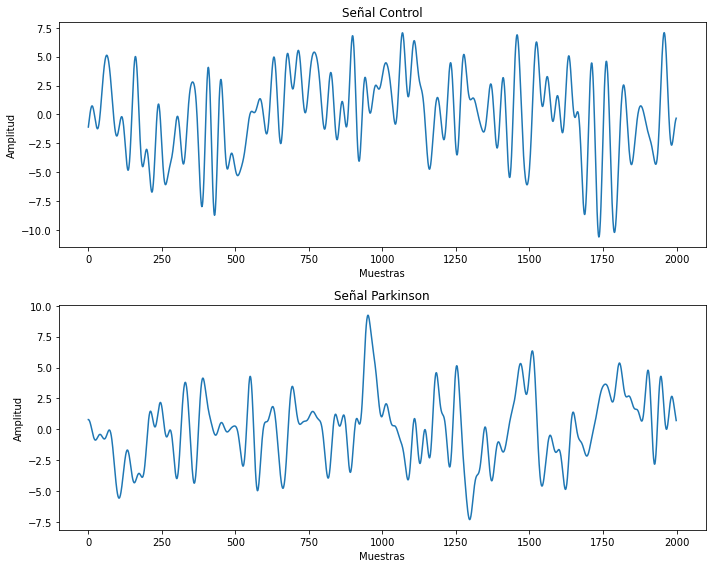

In [77]:
# Visualización de señales

fig = plt.figure(figsize=(10, 8))  # Crea una figura de matplotlib con un tamaño específico (10 pulgadas de ancho, 8 pulgadas de alto)
plt.subplot(2, 1, 1)  # Divide la figura en una cuadrícula de 2 filas y 1 columna, y selecciona el primer subplot (arriba)
plt.plot(senal_continuaC[0, 0:2000])  # Muestra una gráfica de los primeros 2000 puntos del primer canal (índice 0) de la señal control
plt.title('Señal Control')  # Establece el título del subplot superior como "Señal Control"
plt.xlabel('Muestras')  # Etiqueta el eje X como "Muestras"
plt.ylabel('Amplitud')  # Etiqueta el eje Y como "Amplitud"

plt.subplot(2, 1, 2)  # Selecciona el segundo subplot (abajo)
plt.plot(senal_continuaP[0, 0:2000])  # Muestra una gráfica de los primeros 2000 puntos del primer canal (índice 0) de la señal Parkinson
plt.title('Señal Parkinson')  # Establece el título del subplot inferior como "Señal Parkinson"
plt.xlabel('Muestras')  # Etiqueta el eje X como "Muestras"
plt.ylabel('Amplitud')  # Etiqueta el eje Y como "Amplitud"

plt.tight_layout()  # Ajusta el espacio entre los subplots para evitar superposiciones de elementos
plt.show()  # Muestra la figura creada

1.	Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.

In [78]:
def average_energy(signal):
    """
    Calcula la energía promedio de cada canal en una señal multidimensional.

    Args:
        signal: Una matriz que representa una señal

    Returns:
        Un array NumPy que contiene la energía promedio de cada canal.
    """

    canales, puntos, epocas = signal.shape  # Obtiene las dimensiones de la señal

    # Calcula la energía de cada época
    energia_epoca = np.sum(signal**2, axis=1)  # Calcula la suma de los cuadrados de cada elemento en cada época (energía de cada época)

    # Calcula la energía promedio de cada canal
    energia_promedio = np.mean(energia_epoca, axis=1)  # Calcula el promedio de la energía de cada época para cada canal

    return energia_promedio  # Devuelve un array con la energía promedio de cada canal

2.	Calcule la energía de cada canal promediada por épocas para cada sujeto, esto para ambos grupos poblacionales. Guarde esta información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para cada grupo poblacional. 

In [79]:
def dataFr(data):
    """
    Crea un DataFrame de Pandas a partir de los datos de energía promedio de cada canal y sujeto.

    Args:
        data: Una lista de matrices que representa los datos de la energía promedio.

    Returns:
        Un DataFrame de Pandas con las siguientes columnas:
            - sujeto: El número de identificación del sujeto.
            - canal 1, canal 2, ..., canal 8: La energía promedio de cada canal para cada sujeto.
    """

    datos = {'sujeto': [], 'canal 1': [], 'canal 2': [], 'canal 3': [], 'canal 4': [], 'canal 5': [], 'canal 6': [], 'canal 7': [], 'canal 8': []}  # Se crea un diccionario vacío para almacenar los datos, con una llave para cada canal y una llave para el número de sujeto
    for sujeto in range(len(data)):  # Itera sobre cada sujeto en los datos
        E_promedio = average_energy(data[sujeto])  # Calcula la energía promedio para cada canal del sujeto actual
        datos['sujeto'].append(sujeto + 1)  # Agrega el número de sujeto al diccionario
        for canal in range(len(E_promedio)):  # Itera sobre cada canal
            datos[f'canal {canal+1}'].append(E_promedio[canal])  # Agrega la energía promedio del canal al diccionario
    df = pd.DataFrame(datos)  # Convierte el diccionario en un DataFrame de Pandas
    return df  # Devuelve el DataFrame

In [80]:
# Sujetos de control
df_control=dataFr(control) # Llama a la función dataFr para crear un DataFrame de Pandas con la información de los sujetos de control
print(df_control) # Imprime el DataFrame completo en la consola

    sujeto       canal 1       canal 2       canal 3       canal 4  \
0        1  21465.650358  20985.907912  22760.149588  18505.640284   
1        2  15966.402868  17617.810248  20804.937129  19654.400017   
2        3  14148.673322  18283.999666  28749.932148  14270.726911   
3        4  35311.301696  34916.686010  38800.429029  35427.031127   
4        5  18510.829979  19738.489375  20911.792748  21828.254399   
5        6  13180.109317  13925.217812  16218.994223  12324.883659   
6        7  11197.554574  10948.368805  12737.004665  10745.161921   
7        8  28551.124065  26204.839254  17383.998956  17244.605933   
8        9   9133.036290   9214.155028  11626.411811  10809.621612   
9       10  47166.556798  55107.798641  52286.884667  34682.656928   
10      11  17567.465030  21738.511853  29429.308030  28530.200793   
11      12  31250.507507  24222.776323  28298.111428  25378.777621   
12      13  34036.502777  35276.242239  37728.034174  30403.012785   
13      14   4915.06

In [81]:
# Sujetos Parkinson
df_Parkinson=dataFr(parkinson) # Llama a la función dataFr para crear un DataFrame de Pandas con la información de los sujetos de parkinson
print(df_Parkinson) # Imprime el DataFrame completo en la consola

    sujeto       canal 1       canal 2       canal 3       canal 4  \
0        1  12438.243570  11261.175800  10819.634775   9489.784462   
1        2  17995.660058  12001.601821  12286.344400  14785.908284   
2        3  38092.102574  43575.379457  41979.994799  41715.287990   
3        4  23742.325612  22070.007569  24540.315612  21803.936448   
4        5  48574.518921  51806.529769  73171.952374  59707.699631   
5        6  16202.416566  13124.247855  13988.674335  12752.027365   
6        7  10692.948223  10841.187262  12154.390086  24161.685202   
7        8  12157.229828  13398.658526  17668.877657  14841.104693   
8        9   9581.810471  14008.572615   9589.230257   9374.085669   
9       10  23658.738825  23990.255991  30633.745996  22888.894132   
10      11  23446.051598  26091.341850  36640.531850  25660.222773   
11      12  48923.874237  64324.769523  85175.914992  78087.225852   
12      13  14532.459483  17860.192841  30120.983497  29569.273094   
13      14  29402.19

3.	Determine si existe diferencia estadística entre canales de cada grupo de sujetos a través de una prueba t. Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los canales entre grupos de sujetos. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney). Este numeral tiene como objetivo identificar los canales que entregan información diferencial entre pacientes Sanos y con enfermedad de Parkinson.

In [82]:
# Prueba de normalidad
def Test_norm(data, alpha):
    """
    Realiza una prueba de normalidad para cada columna de un DataFrame.

    Args:
        data: Un DataFrame de Pandas donde la primera columna contiene los nombres de los sujetos y las siguientes columnas contienen los datos a evaluar.
        alpha: El nivel de significancia para la prueba de hipótesis.

    Returns:
        Imprime un mensaje indicando si cada columna se distribuye de forma normal o no.
    """

    for i in data.columns[1:]:  # Itera sobre todas las columnas a partir de la segunda (los canales)
        [statistic, pvalue] = stats.normaltest(data[i])  # Aplica la prueba de normalidad de Shapiro-Wilk a la columna actual
        if pvalue > alpha:  # Si el valor p es mayor que el nivel de significancia
            print(f'El {i} distribuye normal')  # Se concluye que la columna se distribuye de forma normal
        else:
            print(f'El {i} no distribuye normal')  # Se concluye que la columna no se distribuye de forma normal

In [83]:
print("Prueba normalidad control:")
Test_norm(df_control, 0.05)  # Llama a la función Test_norm para evaluar la normalidad de los datos de control.
print(" \nPrueba normalidad parkinson:")
Test_norm(df_Parkinson, 0.05)  # Llama a la función Test_norm para evaluar la normalidad de los datos de Parkinson.

Prueba normalidad control:
El canal 1 distribuye normal
El canal 2 no distribuye normal
El canal 3 no distribuye normal
El canal 4 no distribuye normal
El canal 5 no distribuye normal
El canal 6 no distribuye normal
El canal 7 no distribuye normal
El canal 8 no distribuye normal
 
Prueba normalidad parkinson:
El canal 1 distribuye normal
El canal 2 no distribuye normal
El canal 3 no distribuye normal
El canal 4 no distribuye normal
El canal 5 no distribuye normal
El canal 6 no distribuye normal
El canal 7 no distribuye normal
El canal 8 no distribuye normal


In [84]:
# Prueba de homocedasticidad
def Test_hom(data, alpha):
    """
    Realiza una prueba de homocedasticidad utilizando la prueba de Levene.

    Args:
        data: Un DataFrame de Pandas con los datos numéricos.
        alpha: El nivel de significancia para la prueba de hipótesis.

    Returns:
        Imprime el valor p de la prueba y una conclusión sobre si se cumple o no el supuesto de homocedasticidad.
    """

    data = data[1:]  # Se eliminan las primeras columnas (no numéricas) para la prueba
    [statistic, pvalue] = stats.levene(*[data[col] for col in data.columns])  # Prueba de Levene sobre todas las columnas numéricas
    print(f'Valor p: {pvalue}')  # Imprime el valor p de la prueba
    if pvalue > alpha:  # Si el valor p es mayor que el nivel de significancia
        print('Cumple supuesto de homocedasticidad')  # Las varianzas no son significativamente diferentes
    else:
        print('No cumple supuesto de homocedasticidad')

In [85]:
print("Prueba Homocedasticidad control:") 
Test_hom(df_control,0.05) # Llama a la función Test_hom para evaluar la normalidad de los datos de control.
print(" \nPrueba Homocedasticidad parkinson:")
Test_hom(df_Parkinson,0.05) # Llama a la función Test_hom para evaluar la normalidad de los datos de parkinson.

Prueba Homocedasticidad control:
Valor p: 4.768371886543356e-13
No cumple supuesto de homocedasticidad
 
Prueba Homocedasticidad parkinson:
Valor p: 1.315590917554413e-05
No cumple supuesto de homocedasticidad


In [86]:
def Mann_whit(data1, nombre1, data2, nombre2, alpha, a):
    """
    Realiza la prueba de Mann-Whitney-U para comparar dos muestras independientes.

    Args:
        data1: DataFrame que contiene los datos del primer grupo.
        nombre1: Nombre del primer grupo.
        data2: DataFrame que contiene los datos del segundo grupo.
        nombre2: Nombre del segundo grupo.
        alpha: Nivel de significancia para la prueba.
        a: Índice de la columna (canal) a comparar.

    Returns:
        Imprime un mensaje indicando si existe una diferencia significativa entre los dos grupos en el canal especificado, y el valor p de la prueba.
    """

    [statistic, pvalue] = stats.mannwhitneyu(data1[a], data2[a])  # Calcula la estadística de prueba y el valor p
    if pvalue < alpha:
        print(f'Existe diferencia significativa entre el {a} de los grupos {nombre1} y {nombre2}')
    else:
        print(f'No existe diferencia significativa entre el {a} de los grupos {nombre1} y {nombre2}')
    print(f'Valor p: {pvalue} \n')

In [87]:
# Itera sobre las columnas del DataFrame df_control, excluyendo la primera columna.
for i in df_control.columns[1:]:
    Mann_whit(df_control,"control",df_Parkinson,"parkinson",0.05,i)

No existe diferencia significativa entre el canal 1 de los grupos control y parkinson
Valor p: 0.2028502857862456 

No existe diferencia significativa entre el canal 2 de los grupos control y parkinson
Valor p: 0.28526410144447967 

No existe diferencia significativa entre el canal 3 de los grupos control y parkinson
Valor p: 0.23018644453671783 

No existe diferencia significativa entre el canal 4 de los grupos control y parkinson
Valor p: 0.11723092478279912 

No existe diferencia significativa entre el canal 5 de los grupos control y parkinson
Valor p: 0.28000875298727834 

No existe diferencia significativa entre el canal 6 de los grupos control y parkinson
Valor p: 0.14003738246423714 

No existe diferencia significativa entre el canal 7 de los grupos control y parkinson
Valor p: 0.05915040786446003 

No existe diferencia significativa entre el canal 8 de los grupos control y parkinson
Valor p: 0.07527214679357204 



Se utiliza la enrgia promedio realizada en el punto dos para determinar si existe diferencia estadística entre canales de cada grupo de sujetos, para ello se realizan los supuestos (Normalidad, homocedasticidad) y determinar si los datos siquen una distribucion normal (Pruebas Parametricas) o si los datos no siguen una distribución normal (Pruebas no parametricas).
En nuestro caso los resultados de normalidad indican que solo el canal 1 distribuye de forma normal en ambos grupos, mientras que los demás canales no siguen una distribución normal. Esto implica que no se cumple el supuesto de normalidad y por tanto la prueba t de Student no es adecuada para comparar los canales y se deberia recurrir  a un análisis no paramétrico. En la prueba de homocedasticidad el resultado para ambos grupos mostro valores p muy pequeños (4.76e-13 para el grupo control y 1.31e-05 para el grupo Parkinson), lo que indica que no se cumple el supuesto de homocedasticidad. ESto corrobora que se nesecita realizae la prueba de Mann-Whitney.

Se realiza la prueba de Mann-Whitney y Dado que los valores p son todos mayores que el umbral común de significancia (α=0.05), no hay evidencia suficiente para afirmar que existe una diferencia significativa entre los grupos control y Parkinson en ningún canal. Sin embargo, los canales 7 y 8 muestran valores p cercanos al umbral de significancia, lo que sugiere que podría haber una tendencia hacia una diferencia en esos canales, aunque no es concluyente en este análisis.

**planteamento de hipótesis**

Hipótesis nula: No existe diferencia significativa en la distribución de la energía de los canales de EEG entre los pacientes con Parkinson y los sujetos control.

Hipótesis alternativa: Existe una diferencia significativa en la distribución de la energía de los canales de EEG entre los pacientes con Parkinson y los sujetos control.

Para todos los canales, los valores p son mayores a 0.05, lo que significa que no se puede rechazar la hipótesis nula en ninguno de los canales. En conclusion no se encontro diferencias estadísticamente significativas en la energía de los canales de EEG entre los pacientes con Parkinson y los sujetos control.